# LB-Colloids D2Q9 lattice Boltzmann module

A two dimensional, nine fluid node lattice Boltzmann implementation is include in the LB-Colloids package. This tutorial goes over the basic of how to build and run a lattice Boltzmann simulation using this implementation

The first step is to set-up our work environment

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from lb_colloids import LBImage, LB2DModel  # lattice Boltzmann imports from LB-Colloids

workspace = os.path.join("..", "data")
domain = "test_image.png"

We can start by using the `LBImage` module to prepare our data for lattice Boltzmann models. This module contains two classes will be used:

`Images` and
`BoundaryCondition`

Let's start by loading an image and viewing it with matplotlib

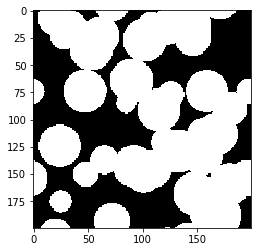

In [2]:
img = LBImage.Images(os.path.join(workspace, domain))  # load image

plt.imshow(img.arr, interpolation="None", cmap="gray")

After the image is loaded, it can be prepared for use in a lattice Boltzmann model using the `BoundaryCondition` class. Some inputs that are needed include:

`fluidvx`: the greyscale value(s) of fluid voxels

`solidvx`: the greyscale value(s) of solid voxels

`nlayers`: number of boundary layers to add to the top and bottom of the domain

lets find out what the greyscale values are in the image of our model domain using numpy

In [3]:
import numpy as np

np.unique(img.arr)  # zero corresponds to black, 255 corresponds to white

array([  0, 255])

In [4]:
fluidvx = [0]
solidvx = [255]
nlayers = 5

bc = LBImage.BoundaryCondition(img.arr, fluidvx, solidvx, nlayers)

('Porosity: ', 0.4044)


We can now grab a binary domain, that is prepared for lattice Boltzmann models, from the `LBImage.BoundaryCondition` object

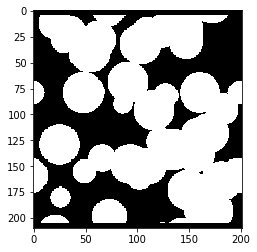

In [5]:
binary = bc.binarized

plt.imshow(binary, interpolation="None", cmap="gray")

### Now we can parameterize a lattice Boltzmann model

Lattice Boltzmann will run using a compiled and shared FORTRAN library specially made for LB-Colloids.

Let's make and run a model with a basic parameterization

In [6]:
output = "test_image.hdf5"
rho = 1.  # initial non-dimensional fluid density
body_force = 0.0001  # body force applied to the fluid domain
tau = 1.  # relaxation time parameter
resolution = 1e-06  # model resolution for dimensionalization
iterations = 1000

lbm = LB2DModel(binary)
lbm.niters = iterations
lbm.rho = rho
lbm.body_force = body_force
lbm.tau = tau
lbm.resolution = resolution

Now let's run the model while printing the iteration every 100 time steps

In [7]:
lbm.run(os.path.join(workspace, output), verbose=100)

1000
Iter: 00100
Iter: 00200
Iter: 00300
Iter: 00400
Iter: 00500
Iter: 00600
Iter: 00700
Iter: 00800
Iter: 00900
Iter: 01000
[Writing to: ../data/test_image.hdf5]


array([[[ 0.11111111,  0.11332045,  0.11380759, ...,  0.11803008,
          0.11833127,  0.11849753],
        [ 0.11111111,  0.1131907 ,  0.11383893, ...,  0.11770757,
          0.11799493,  0.11815435],
        [ 0.11111111,  0.11318183,  0.1139812 , ...,  0.11741689,
          0.11767598,  0.11782111],
        ..., 
        [ 0.11111111,  0.11399803,  0.11405791, ...,  0.11919448,
          0.11944767,  0.11958857],
        [ 0.11111111,  0.1137634 ,  0.11394594, ...,  0.1187762 ,
          0.11905893,  0.11921522],
        [ 0.11111111,  0.11352494,  0.1138536 , ...,  0.11838666,
          0.11868609,  0.11885122]],

       [[ 0.02777778,  0.02943933,  0.02753072, ...,  0.02931348,
          0.02947814,  0.02961792],
        [ 0.02777778,  0.02961245,  0.02737972, ...,  0.02914003,
          0.02933284,  0.02950798],
        [ 0.02777778,  0.0298727 ,  0.02719594, ...,  0.02897767,
          0.02919381,  0.02940125],
        ..., 
        [ 0.02777778,  0.02932334,  0.02774785, ...,

### We can use built in methodology to view the results of our simulation

The `Colloid_output` module contains a number of classes to view results from Lattice Boltzmann and Colloid simulations

Let's start by importing this module

In [8]:
from lb_colloids import ColloidOutput

The two important classes in ColloidOutput for lattice Boltzmann simulations are `LBOutput` and `ModelPlot`.

Let's get our model results loaded using `LBOutput` and check what data we can access

In [9]:
lbout = ColloidOutput.LBOutput(os.path.join(workspace, output))
lbout.keys

['reynolds_number',
 'porosity',
 'velocity_x',
 'velocity_y',
 'lb_velocity_x',
 'lb_velocity_y',
 'conversion_factor',
 'resolution',
 'pore_diameter']

The `get_data` method allows us to dynamically access the data stored in output files

In [10]:
cfac = lbout.get_data('conversion_factor')
por = lbout.get_data('porosity')
por_diam = lbout.get_data('pore_diameter')  # non-dimensional mean pore-diameter

cfac, por, por_diam

(2.2105430039851082, 0.40439999999999998, 23.075606276747504)

### The `ModelPlot` class allows us to visualize some of the output data

Let's start by initializing the class and checking the types of data `ModelPlot` can access if it is available

In [11]:
mplot = ColloidOutput.ModelPlot(os.path.join(workspace, output))
mplot.keys

['ac',
 'reynolds_number',
 'lewis_x',
 'dlvo_x',
 'distance_fine_x',
 'lb_velocity_x',
 'lb_velocity_y',
 'image',
 'brownian_x',
 'lb_mean_velocity_y',
 'lb_mean_velocity_x',
 'edl_fine',
 'attractive_x',
 'attractive_y',
 'edl_y',
 'edl_x',
 'velocity_x',
 'velocity_y',
 'col_col_y',
 'col_col_x',
 'lewis_y',
 'dlvo_y',
 'lvdw_x',
 'distance_x',
 'distance_y',
 'lvdw_y',
 'distance_fine_y',
 'bouyancy',
 'pore_diameter',
 'distance_array',
 'col_col_fine_x',
 'brownian_y',
 'col_col_fine',
 'gravity',
 'dlvo_fine',
 'conversion_factor',
 'col_col',
 'distance_fine',
 'col_col_fine_y',
 'ionic',
 'porosity',
 'attractive_fine']

Let's start by plotting the LB velocity arrays in the X and Y directions

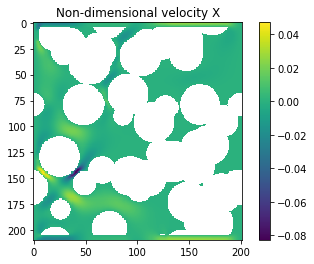

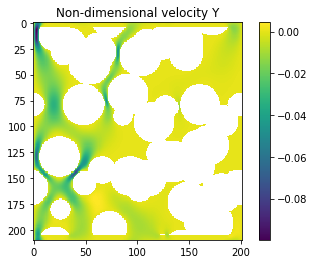

In [12]:
mesh = mplot.plot('lb_velocity_x', masked=True)
plt.colorbar(mesh)
plt.title("Non-dimensional velocity X")
plt.show()

mesh2 = mplot.plot('lb_velocity_y', masked=True)
plt.colorbar(mesh2)
plt.title("Non-dimensional velocity Y")
plt.show()

We can also do Quiver plots showing the velocity magnitudes!

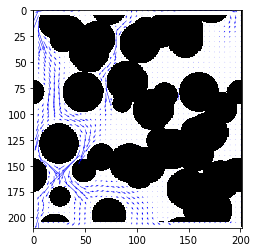

In [13]:
mplot.plot_velocity_magnitude(nbin=5, dimensional=False, masked=True, color="blue")
mplot.plot("image", masked=True, cmap='gray')
plt.show()

There we go. We have a good start at running a LB modeling and visulaizing the results from it!